In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
from pandas import Series,DataFrame

In [2]:
# 转换为pkl文件
head_col = ['year', 'mon', 'day', 'val']

xls_file = pd.ExcelFile('HRLT.xlsx')
# 提取每个 sheet 的指定列数据并保存为 pkl 文件
for sheet_name in xls_file.sheet_names:
    df = pd.read_excel(xls_file, sheet_name=sheet_name, usecols="A:C,G")
    tmp = df.columns
    df.columns = head_col
    df = df.shift(1)
    df.iloc[0] = tmp
    df['day'] = pd.to_numeric(df['day'], errors='coerce')
    df['year'] = df['year'].astype(int)
    df['mon'] = df['mon'].astype(int)
    df['day'] = df['day'].astype(int)
    df['val'] = df['val'].astype(float)
    df.to_pickle(f".//pkls//HRLT//{sheet_name}.pkl")

# xls_file = pd.ExcelFile('CMFD.xlsx')
# # 提取每个 sheet 的指定列数据并保存为 pkl 文件
# for sheet_name in xls_file.sheet_names:
#     df = pd.read_excel(xls_file, sheet_name=sheet_name, usecols="A:C,G")
#     tmp = df.columns
#     df.columns = head_col
#     df = df.shift(1)
#     df.iloc[0] = tmp
#     df['day'] = pd.to_numeric(df['day'], errors='coerce')
#     df['year'] = df['year'].astype(int)
#     df['mon'] = df['mon'].astype(int)
#     df['day'] = df['day'].astype(int)
#     df['val'] = df['val'].astype(float)
#     df.to_pickle(f".//pkls//CMFD//{sheet_name}.pkl")

# xls_file = pd.ExcelFile('station.xlsx')
# # 提取每个 sheet 的指定列数据并保存为 pkl 文件
# for sheet_name in xls_file.sheet_names:
#     df = pd.read_excel(xls_file, sheet_name=sheet_name, usecols="E:G,H")
#     tmp = df.columns
#     # print(tmp)
#     df.columns = head_col
#     df = df.shift(1)
#     df.iloc[0] = tmp
#     df['day'] = pd.to_numeric(df['day'], errors='coerce')
#     df['year'] = df['year'].astype(int)
#     df['mon'] = df['mon'].astype(int)
#     df['day'] = df['day'].astype(int)
#     df['val'] = df['val'].astype(float)
#     df.to_pickle(f".//pkls//station//{sheet_name}.pkl")

In [3]:
# test
data = pd.read_pickle('.\\pkls\\ERA5\\51053.pkl')
print(data)

      year  mon  day  val
0     2001    1    1  0.6
1     2001    1    2  0.5
2     2001    1    3  6.0
3     2001    1    4  9.1
4     2001    1    5  1.1
...    ...  ...  ...  ...
6568  2018   12   26  0.0
6569  2018   12   27  0.0
6570  2018   12   28  0.0
6571  2018   12   29  0.6
6572  2018   12   30  0.1

[6573 rows x 4 columns]


In [3]:
# 预处理    数据限制在01-17年
import os
# path = './pkls/station'
# filelist = os.listdir(path)
# # print(filelist)
# for file in filelist:
#     file_path = os.path.join(path, file)
#     data = pd.read_pickle(file_path)
#     data = data[(data['year'] >= 2001) & (data['year'] <= 2017)]
#     # print(file_path + ' ' + str(data.iloc[-1]['year']))
#     data.to_pickle(file_path)

path = './pkls/HRLT'
filelist = os.listdir(path)
# print(filelist)
for file in filelist:
    file_path = os.path.join(path, file)
    data = pd.read_pickle(file_path)
    data = data[(data['year'] >= 2001) & (data['year'] <= 2017)]
    # print(file_path + ' ' + str(data.iloc[-1]['year']))
    data.to_pickle(file_path)

# path = './pkls/CMFD'
# filelist = os.listdir(path)
# # print(filelist)
# for file in filelist:
#     file_path = os.path.join(path, file)
#     data = pd.read_pickle(file_path)
#     data = data[(data['year'] >= 2001) & (data['year'] <= 2017)]
#     # print(file_path + ' ' + str(data.iloc[-1]['year']))
#     data.to_pickle(file_path)

In [4]:
# test
data = pd.read_pickle('.\\pkls\\HRLT\\51053.pkl')
print(data)

      year  mon  day   val
0     2001    1    1  1.27
1     2001    1    2  1.37
2     2001    1    3  1.20
3     2001    1    4  5.91
4     2001    1    5  5.23
...    ...  ...  ...   ...
6204  2017   12   27  0.00
6205  2017   12   28  0.00
6206  2017   12   29  0.00
6207  2017   12   30  0.23
6208  2017   12   31  0.00

[6209 rows x 4 columns]


In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error

def correlation_coefficient(observed, estimated):
    correlation_matrix = np.corrcoef(observed, estimated)
    return correlation_matrix[0, 1]

def root_mean_squared_error(observed, estimated):
    return np.sqrt(mean_squared_error(observed, estimated))

def mean_absolute_error(observed, estimated):
    return np.mean(np.abs(observed - estimated))

def relative_bias(observed, estimated):
    return np.mean((estimated - observed) / observed) * 100

def root_mean_squared_error(observed, estimated):
    # 检查是否存在空值
    if observed.isnull().any() or estimated.isnull().any():
        return np.nan  # 返回NaN值或者其他适当的处理方法
    else:
        return np.sqrt(mean_squared_error(observed, estimated))

In [6]:
# CMFD
import os
import csv
import pandas as pd

# 设置文件路径
path_observed = './pkls/station'
path_product = './pkls/HRLT'

# 获取站点文件列表
observed_files = os.listdir(path_observed)
product_files = os.listdir(path_product)

# 存储每个站点的结果
results = {}

# CMFD
# 遍历每个站点文件
for observed_file in observed_files:
    if observed_file in product_files:
        try:
            # 读取地面观测数据
            observed_data = pd.read_pickle(os.path.join(path_observed, observed_file))
            # 检查数据是否有效
            if observed_data.empty:
                raise ValueError("Observed data is empty or invalid")
            
            df_observed = pd.DataFrame({'year': observed_data['year'],
                                        'month': observed_data['mon'],
                                        'day': observed_data['day']})
            observed_data['date'] = pd.to_datetime(df_observed, errors='coerce')
            observed_data.drop(['year', 'mon', 'day'], axis=1, inplace=True)

            # 读取降水产品数据
            product_data = pd.read_pickle(os.path.join(path_product, observed_file))
            # 检查数据是否有效
            if product_data.empty:
                raise ValueError("Product data is empty or invalid")

            df_product = pd.DataFrame({'year': product_data['year'],
                                       'month': product_data['mon'],
                                       'day': product_data['day']})
            product_data['date'] = pd.to_datetime(df_product)
            product_data.drop(['year', 'mon', 'day'], axis=1, inplace=True)

            # 根据日期合并数据
            merged_data = pd.merge(observed_data, product_data, on='date')
            merged_data.set_index('date', inplace=True)

            # 按月份和日期重采样
            monthly_grouped = merged_data.resample('M').mean()
            daily_grouped = merged_data.resample('D').mean()

            # 存储合并后的数据
            merged_data.to_pickle('./result/merged_HRLT_station.pkl')

            # 计算月尺度的指标
            cc_month = correlation_coefficient(monthly_grouped['val_x'], monthly_grouped['val_y'])
            rmse_month = root_mean_squared_error(monthly_grouped['val_x'], monthly_grouped['val_y'])
            mae_month = mean_absolute_error(monthly_grouped['val_x'], monthly_grouped['val_y'])
            bias_month = relative_bias(monthly_grouped['val_x'], monthly_grouped['val_y'])

            # 计算日尺度的指标
            cc_daily = correlation_coefficient(daily_grouped['val_x'], daily_grouped['val_y'])
            rmse_daily = root_mean_squared_error(daily_grouped['val_x'], daily_grouped['val_y'])
            mae_daily = mean_absolute_error(daily_grouped['val_x'], daily_grouped['val_y'])
            bias_daily = relative_bias(daily_grouped['val_x'], daily_grouped['val_y'])

            # 存储结果
            results[observed_file] = {
                'cc_month': cc_month,
                'rmse_month': rmse_month,
                'mae_month': mae_month,
                'bias_month': bias_month,
                'cc_daily': cc_daily,
                'rmse_daily': rmse_daily,
                'mae_daily': mae_daily,
                'bias_daily': bias_daily
            }
        except Exception as e:
            print(f"Error processing {observed_file}: {str(e)}")


# 将结果写入CSV文件
with open('./result/HRLT_result.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['station', 'cc_month', 'rmse_month', 'mae_month', 'bias_month',
                                              'cc_daily', 'rmse_daily', 'mae_daily', 'bias_daily'])

    # 写入表头
    writer.writeheader()

    # 写入数据行
    for observed_file, metrics in results.items():
        writer.writerow({'station': observed_file, **metrics})

Error processing 53231.pkl: Observed data is empty or invalid


In [8]:
# GPM
import os
import csv
import pandas as pd

# 设置文件路径
path_observed = './pkls/station'
path_product = './pkls/CMFD'

# 获取站点文件列表
observed_files = os.listdir(path_observed)
product_files = os.listdir(path_product)

# 存储每个站点的结果
results = {}

# CMFD
# 遍历每个站点文件
for observed_file in observed_files:
    if observed_file in product_files:
        try:
            # 读取地面观测数据
            observed_data = pd.read_pickle(os.path.join(path_observed, observed_file))
            # 检查数据是否有效
            if observed_data.empty:
                raise ValueError("Observed data is empty or invalid")
            
            df_observed = pd.DataFrame({'year': observed_data['year'],
                                        'month': observed_data['mon'],
                                        'day': observed_data['day']})
            observed_data['date'] = pd.to_datetime(df_observed, errors='coerce')
            observed_data.drop(['year', 'mon', 'day'], axis=1, inplace=True)

            # 读取降水产品数据
            product_data = pd.read_pickle(os.path.join(path_product, observed_file))
            # 检查数据是否有效
            if product_data.empty:
                raise ValueError("Product data is empty or invalid")

            df_product = pd.DataFrame({'year': product_data['year'],
                                       'month': product_data['mon'],
                                       'day': product_data['day']})
            product_data['date'] = pd.to_datetime(df_product)
            product_data.drop(['year', 'mon', 'day'], axis=1, inplace=True)

            # 根据日期合并数据
            merged_data = pd.merge(observed_data, product_data, on='date')
            merged_data.set_index('date', inplace=True)

            # 按月份和日期重采样
            monthly_grouped = merged_data.resample('M').mean()
            daily_grouped = merged_data.resample('D').mean()

            # 存储合并后的数据
            merged_data.to_pickle('./result/merged_CMFD_station.pkl')

            # 计算月尺度的指标
            cc_month = correlation_coefficient(monthly_grouped['val_x'], monthly_grouped['val_y'])
            rmse_month = root_mean_squared_error(monthly_grouped['val_x'], monthly_grouped['val_y'])
            mae_month = mean_absolute_error(monthly_grouped['val_x'], monthly_grouped['val_y'])
            bias_month = relative_bias(monthly_grouped['val_x'], monthly_grouped['val_y'])

            # 计算日尺度的指标
            cc_daily = correlation_coefficient(daily_grouped['val_x'], daily_grouped['val_y'])
            rmse_daily = root_mean_squared_error(daily_grouped['val_x'], daily_grouped['val_y'])
            mae_daily = mean_absolute_error(daily_grouped['val_x'], daily_grouped['val_y'])
            bias_daily = relative_bias(daily_grouped['val_x'], daily_grouped['val_y'])

            # 存储结果
            results[observed_file] = {
                'cc_month': cc_month,
                'rmse_month': rmse_month,
                'mae_month': mae_month,
                'bias_month': bias_month,
                'cc_daily': cc_daily,
                'rmse_daily': rmse_daily,
                'mae_daily': mae_daily,
                'bias_daily': bias_daily
            }
        except Exception as e:
            print(f"Error processing {observed_file}: {str(e)}")


# 将结果写入CSV文件
with open('./result/CMFD_result.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['station', 'cc_month', 'rmse_month', 'mae_month', 'bias_month',
                                              'cc_daily', 'rmse_daily', 'mae_daily', 'bias_daily'])

    # 写入表头
    writer.writeheader()

    # 写入数据行
    for observed_file, metrics in results.items():
        writer.writerow({'station': observed_file, **metrics})

Error processing 53231.pkl: Observed data is empty or invalid


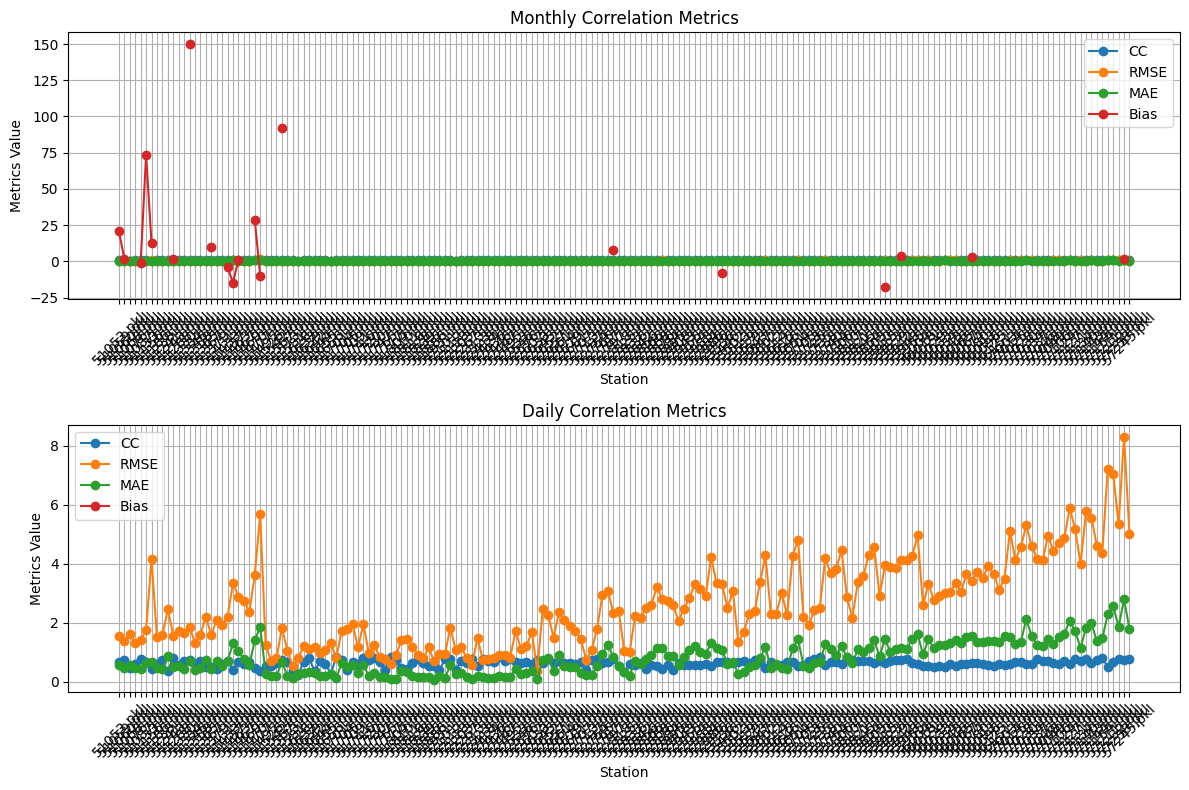

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 从CSV文件读取数据
data = pd.read_csv('./result/HRLT_result.csv')

# 绘制相关性图表
plt.figure(figsize=(12, 8))

# 月尺度相关性图
plt.subplot(2, 1, 1)
plt.plot(data['station'], data['cc_month'], marker='o', linestyle='-', label='CC')
plt.plot(data['station'], data['rmse_month'], marker='o', linestyle='-', label='RMSE')
plt.plot(data['station'], data['mae_month'], marker='o', linestyle='-', label='MAE')
plt.plot(data['station'], data['bias_month'], marker='o', linestyle='-', label='Bias')
plt.title('Monthly Correlation Metrics')
plt.xlabel('Station')
plt.ylabel('Metrics Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# 日尺度相关性图
plt.subplot(2, 1, 2)
plt.plot(data['station'], data['cc_daily'], marker='o', linestyle='-', label='CC')
plt.plot(data['station'], data['rmse_daily'], marker='o', linestyle='-', label='RMSE')
plt.plot(data['station'], data['mae_daily'], marker='o', linestyle='-', label='MAE')
plt.plot(data['station'], data['bias_daily'], marker='o', linestyle='-', label='Bias')
plt.title('Daily Correlation Metrics')
plt.xlabel('Station')
plt.ylabel('Metrics Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()